# Business Problem
As the owner of a supermarket mall, you have valuable data on your customers, including their demographics (age, gender, annual income) and spending behavior (Spending Score). You want to better understand and segment your customers to target them more effectively with personalized marketing strategies.

The goal is to use KMeans Clustering, an unsupervised machine learning algorithm, to group customers into segments based on their similarities in spending behavior and demographic features. By doing this, you can identify the target customers who are more likely to engage with marketing campaigns, optimize your advertising efforts, and improve customer retention.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [10]:
df = pd.read_csv(r"C:\Users\divya\Downloads\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.rename(columns={"Annual Income (k$)":"Income",
                  "Spending Score (1-100)":"Score"}, inplace=True)

In [14]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop(columns=["CustomerID",'Genre','Age'],inplace=True)


In [17]:
df.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


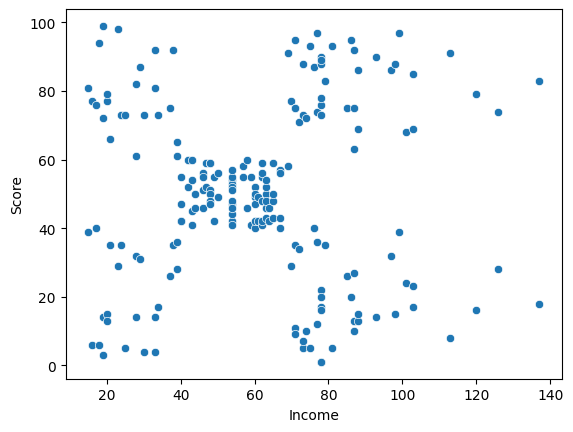

In [18]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

**For UnSupervised machine learning, there is no output variable**

In [20]:
X = df

# 1. KMenas Clustering
- **Find the optimal number of clusters: Elbow Curve**

In [22]:
wcss = []
from sklearn.cluster import KMeans

for K in range(1,11):
  
  Kmeans = KMeans(n_clusters = K,random_state=0, init = 'k-means++')
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)
    
print(wcss)

[269981.28, 185917.14253928524, 106348.37306211119, 73679.78903948836, 44448.45544793371, 38858.9599751439, 31969.426550235476, 29858.483597603947, 22209.851608025547, 20786.936692059156]


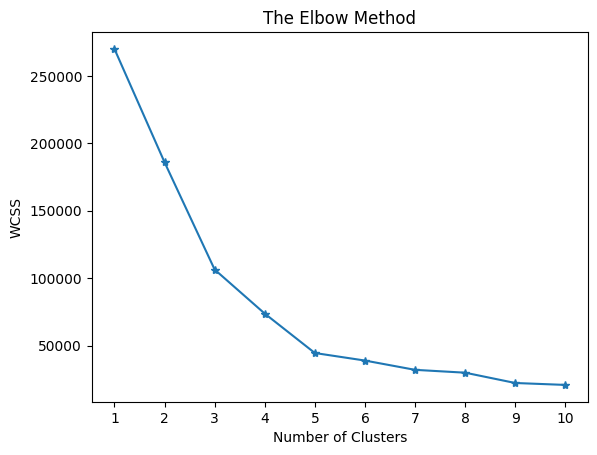

In [23]:
#Using the elbowz method
plt.plot(range(1,11),wcss,marker="*")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:

kmeans =KMeans(n_clusters = 5, init = 'k-means++', random_state = True)

#fit & predict
X['km_cluster'] = kmeans.fit_predict(X)

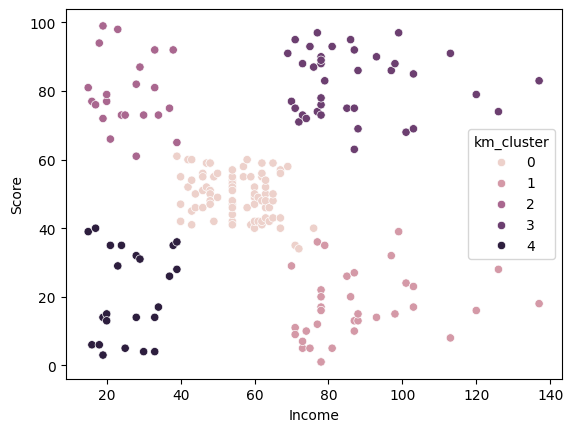

In [25]:
sns.scatterplot(x="Income",y='Score',hue='km_cluster',data=X)
plt.show()

**Clustering - Observation**
- Cluster 0 : Average Income, Average Spending Score - Can target these set of customers by providing them with Low cost EMI's etc.
- Cluster 1 : High Income, Low Spending Score - Target these customers by asking the feedback and advertising the product in a better way.
- Cluster 2 : Low Income, High Spending Score - May or may not target these group of customers based on the policy of the mall.
- Cluster 3 : High Income, High Spending Score - **Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.**
- Cluster 4 : Low Income, Low Spending Score - Don't target these customers since they have less income and need to save money.

# 2. Hirearchical CLustering

Identifying the **optimal number of clusters** using **Dendrogram**

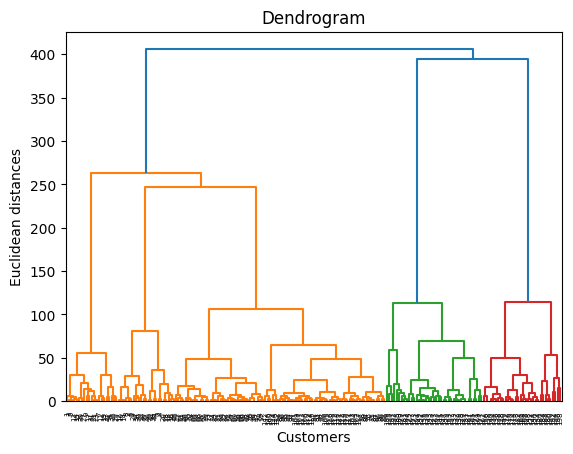

In [28]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(X, method = 'ward')
dengrogram = sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

**Hierarchical Clustering Model**

In [30]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean',linkage='ward')
X['h_cluster'] = hc.fit_predict(X)

In [31]:
print(X.columns)

Index(['Income', 'Score', 'km_cluster', 'h_cluster'], dtype='object')


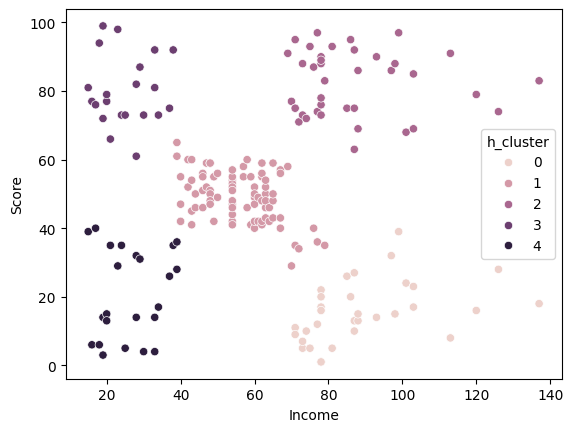

In [32]:
sns.scatterplot(x="Income",y='Score',hue='h_cluster',data=X)
plt.show()

# 3. DBSCAN Clustering   (Density-Based Spatial Clustering of Applications with Noise)

In [34]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r, min_samples=m)
        X['db_cluster']=dbs.fit_predict(X)

    if X["db_cluster"].nunique()==5:
       break

print('eps:',r)
print('min:',m)

eps: 8
min: 9


In [35]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=8, min_samples=9)
X['db_cluster'] = dbs.fit_predict(X)

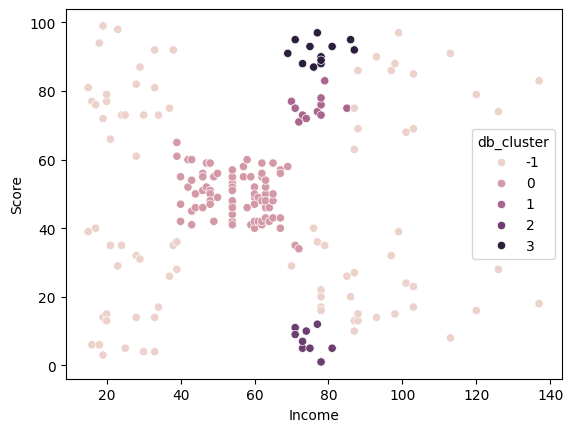

In [36]:

sns.scatterplot(x="Income",y='Score',hue='db_cluster',data=X)
plt.show()

In [37]:
X[X['km_cluster'] == 0]

,Income,Score,km_cluster,h_cluster,db_cluster
43,39,61,0,1,0
46,40,55,0,1,0
47,40,47,0,1,0
48,40,42,0,1,0
49,40,42,0,1,0
...,...,...,...,...,...
121,67,40,0,1,0
122,69,58,0,1,0
126,71,35,0,1,0
132,72,34,0,1,0


In [38]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(kmeans, 'kmeans.joblib')


['kmeans.joblib']

In [39]:
# Assuming 'model' is your trained model
joblib.dump(hc, 'hc.joblib')


['hc.joblib']

In [65]:
# Assuming 'model' is your trained model
joblib.dump(dbs, 'dbs.joblib')


['dbs.joblib']